In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,normalize,minmax_scale,RobustScaler
from sklearn.metrics import silhouette_score
from scipy import stats
%matplotlib inline
from random import sample
from numpy.random import uniform

In [ ]:
#Import data
data = pd.read_csv('File pathname')
data.head()
df=pd.DataFrame(data)
display(df)

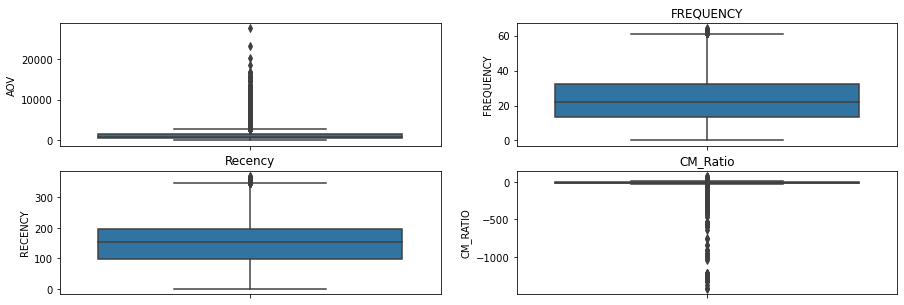

In [21]:
# Create boxplots to see distribution of metrics and identify outliers. For this problem , we will not remove
# the outliers and see if the clustering model segregates them

fig, axes = plt.subplots(2,2, figsize=(15,5))

# for var in ['RECENCY', 'AOV', 'CM_RATIO','FREQUENCY','COUPONS_UTILIZATION','AVG_PAYABLE_BY_CUSTOMER']:
#         sns.boxplot(df[var])

ax1 = sns.boxplot(ax=axes[0,0], y="AOV", data=df)
ax.title.set_text('aov')
ax2 = sns.boxplot(ax=axes[0,1], y="FREQUENCY", data=df)
ax2.title.set_text('FREQUENCY')
ax3 = sns.boxplot(ax=axes[1,0], y="RECENCY", data=df)
ax3.title.set_text('Recency')
ax4 = sns.boxplot(ax=axes[1,1], y="CM_RATIO", data=df)
ax4.title.set_text('CM_Ratio')
# ax5 = sns.boxplot(ax=axes[2], y="COUPONS_UTILIZATION", data=df)
# ax5.title.set_text('Coupons')
# ax3 = sns.boxplot(ax=axes[2], y="AVG_PAYABLE_BY_CUSTOMER", data=df)
# ax3.title.set_text('Payable_by_customer')
# plt.show()

Normalize the data using Standard Scalar. Robust outlier is better while dealing with data with outliers.

In [5]:
cols = df.select_dtypes(np.number).columns
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df[cols]), columns = cols)


In [6]:
df_scaled.describe()

,RECENCY,AOV,CM_RATIO,FREQUENCY,COUPONS_UTILIZATION
count,2.285750e+05,2.285750e+05,2.285750e+05,2.285750e+05,2.285750e+05
mean,1.072710e-14,-4.170090e-16,-1.560925e-15,7.152230e-14,9.169262e-14
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.099573e+00,-1.263012e+00,-5.636956e+01,-1.774686e+00,-1.118529e+00
25%,-7.603328e-01,-6.610911e-01,-1.949988e-01,-7.671812e-01,-1.118529e+00
50%,3.484117e-02,-2.734483e-01,-2.493085e-03,-1.528487e-01,-9.631711e-02
75%,6.347093e-01,3.795694e-01,2.284376e-01,6.285822e-01,9.066067e-01
max,3.034182e+00,2.894642e+01,3.271380e+00,2.967960e+00,1.086926e+01


In [7]:
display(df_scaled)

,RECENCY,AOV,CM_RATIO,FREQUENCY,COUPONS_UTILIZATION
0,-0.606878,-0.761567,0.123328,2.967960,-1.118529
1,-0.048861,-0.258194,-0.220376,2.918814,0.933164
2,-0.467374,-0.230485,-0.185916,2.894240,-1.118529
3,0.592858,-0.698691,1.054384,2.845094,-0.574361
4,-0.341820,-0.303252,0.104022,2.845094,-1.118529
...,...,...,...,...,...
228570,1.848396,1.393902,-0.105694,-1.774686,1.186825
228571,2.406413,-1.037104,0.760487,-1.774686,-1.118529
228572,2.252958,-0.358862,0.400665,-1.774686,-0.616600
228573,1.429883,-0.455001,-1.556419,-1.774686,1.724403


Dimensionality reduction using Principal Component Analysis

In [8]:
pca = PCA(5)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))

In [9]:
display(df_pca)

,0,1,2,3,4
0,-2.387148,-1.517575,0.736765,1.569444,-0.126121
1,-0.535620,-1.739680,0.697320,2.060082,-1.210089
2,-1.944504,-1.534937,0.844459,1.732945,0.283769
3,-1.991802,-1.028090,-0.538869,2.161477,-0.623876
4,-2.027246,-1.459368,0.549578,1.728009,0.194313
...,...,...,...,...,...
228570,2.586244,1.370872,-1.106474,0.202194,0.309270
228571,-0.452118,3.070688,-1.472264,0.062382,0.200952
228572,0.336900,2.656475,-1.259813,0.118531,0.351142
228573,2.221390,2.039997,0.738918,-0.120839,-1.067871


Calculation of variance to identify minimum variables that define the data. 89.7% data defined by 4 variables.

In [10]:
var = pca.explained_variance_ratio_
cum_var = np.cumsum(var)
cum_var

array([0.30915298, 0.56555286, 0.75622222, 0.89736734, 1.        ])

In [11]:
pca = PCA(4)
df_pca = pca.fit_transform(df_scaled)

In [12]:
var = pca.explained_variance_ratio_
cum_var = np.cumsum(var)
cum_var

array([0.30915298, 0.56555286, 0.75622222, 0.89736734])

Plot inertia for number of clusters and identify the optimum number of clusters. 

In [13]:
from sklearn.cluster import KMeans
clust = range(1, 10)
inertia = []
for i in clust:
    kmeans = KMeans(n_clusters = i, random_state = 1, n_init = 15)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)
inertia_df = pd.DataFrame({"n_clusters" : clust, "Inertia" : inertia})
inertia_df

,n_clusters,Inertia
0,1,1.025579e+06
1,2,7.814126e+05
2,3,6.311707e+05
3,4,4.835682e+05
4,5,4.137519e+05
5,6,3.709530e+05
6,7,3.415355e+05
7,8,3.151296e+05
8,9,2.888920e+05


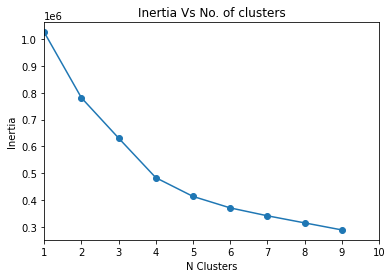

In [14]:
plt.plot(clust, inertia, marker = 'o')
plt.xlabel("N Clusters")
plt.ylabel("Inertia")
plt.title("Inertia Vs No. of clusters")
plt.xlim(1, 10)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
sil = []
k = range(2, 10)
for i in k:
    kmeans = KMeans(n_clusters = i, random_state = 1, n_init = 15)
    kmeans.fit(df_pca)
    labels = kmeans.labels_
    score = silhouette_score(df_pca, labels)
    sil.append(score)
sil_df = pd.DataFrame({"n_clusters" : k, "Silhouette Score" : sil})
sil_df

In [ ]:
plt.plot(k, sil, marker = 'x', c = 'g')
plt.xlabel("N Clusters")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores Vs No. of clusters")
plt.xlim(2, 10)
plt.show()

We can see that as we increase k value, the silhouette score is increasing. Since generally we do not take number of clusters in double digit values we will plot scatter plots to check the separation between clusters for different k values.

/Users/anukul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


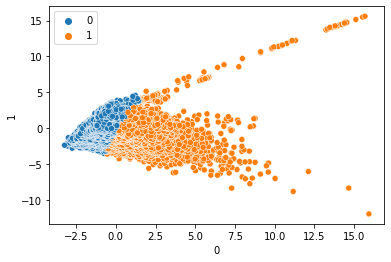

/Users/anukul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


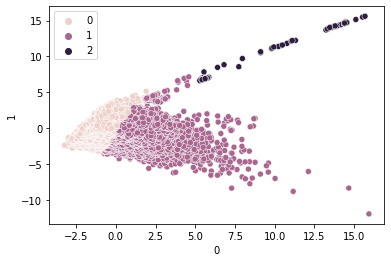

/Users/anukul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


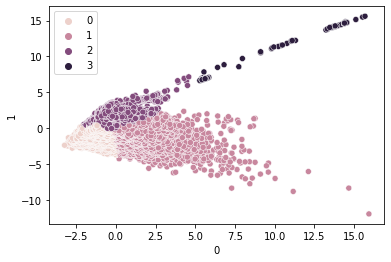

/Users/anukul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


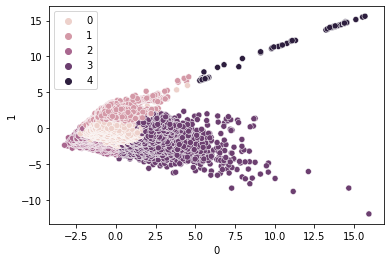

/Users/anukul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


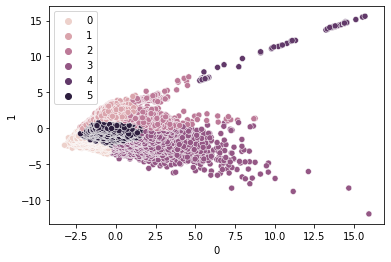

/Users/anukul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


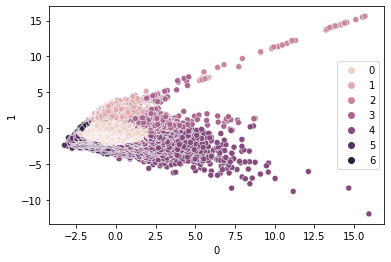

/Users/anukul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


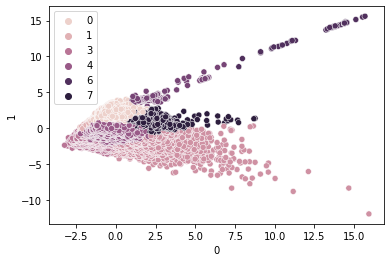

/Users/anukul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


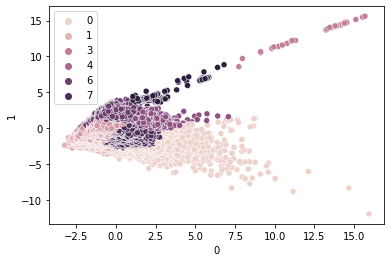

In [15]:
df_pca = pd.DataFrame(df_pca)
k = range(2, 10)
for i in k:
    kmeans = KMeans(n_clusters = i, random_state = 1, n_init = 15)
    kmeans.fit(df_pca)
    labels = kmeans.labels_
    sns.scatterplot(df_pca.iloc[:, 0], df_pca.iloc[:, 1], hue = labels)
    plt.show()

In [126]:
display(df_pca)

,0,1,2,3
0,-2.387148,-1.517575,0.736765,1.569444
1,-0.535620,-1.739680,0.697320,2.060082
2,-1.944504,-1.534937,0.844459,1.732945
3,-1.991802,-1.028090,-0.538869,2.161477
4,-2.027246,-1.459368,0.549578,1.728009
...,...,...,...,...
228570,-0.452118,3.070688,-1.472264,0.062382
228571,-0.351207,3.134007,-0.854457,0.039468
228572,2.657155,0.606168,-0.666072,-0.596798
228573,-0.539552,2.734965,-0.914719,-0.366615


In [ ]:
    kmeans = KMeans(n_clusters = 5, random_state = 1, n_init = 15)
    kmeans.fit(df_pca)
    labels = kmeans.labels_

In [ ]:
df["Cluster"]=labels

In [ ]:
display(df)

In [ ]:
# Create boxplots to show AOV, Frequency and CM for each cluster
fig, axes = plt.subplots(1, 3, figsize=(15,5))
ax = sns.boxplot(ax=axes[0], x="Cluster", y="AOV", data=df)
ax.title.set_text('AOV in All Clusters')
ax2 = sns.boxplot(ax=axes[1], x="Cluster", y="FREQUENCY", data=df)
ax2.title.set_text('Frequency in All Clusters')
ax3 = sns.boxplot(ax=axes[2], x="Cluster", y="CM_RATIO", data=df)
ax3.title.set_text('CM in All Clusters')
plt.show()

In [158]:
df.groupby('Cluster').agg({
    'CM_RATIO':'mean',
    'RECENCY':'mean',
    'FREQUENCY':'mean',
    'COUPONS_UTILIZATION':'mean',
    'AOV':'mean'})

,CM_RATIO,RECENCY,FREQUENCY,COUPONS_UTILIZATION,AOV
Cluster,,,,,
0,-2.145078,105.565907,35.351464,4.463477,765.468835
1,-9.606032,140.711334,21.422673,20.405370,1975.448307
2,-5.633622,208.263809,15.382035,6.622186,742.447963
3,-944.778680,278.603604,0.166250,0.013985,5.996200


In [160]:
df.to_csv('Filepath')